In [17]:
%%capture
# open the canference call 1 file in read mode
with open('/content/Call 1.txt') as file1:

    # read the contents of the file into a string
    call1 = file1.read()

# open the canference call 2 file in read mode
with open('/content/Call 2.txt') as file2:

    # read the contents of the file into a string
    call2 = file2.read()

# open the canference call 2 file in read mode
with open('/content/Call 3.txt') as file3:

    # read the contents of the file into a string
    call3 = file3.read()

In [18]:
%%capture
# call 1
participantsCall1 = [
    'Hanyu Liu -- Investor Relations'
'Rongjie Dong -- Chief Executive Officer'
'Ashley Wu -- Vice President, Finance'
'Thomas Chong -- Jefferies -- Analyst'
'Yiwen Zhang -- China Renaissance -- Analyst'
'Ritchie Sun -- HSBC -- Analyst'
'Lei Zhang -- Bank of America Merrill Lynch -- Analyst'
    ]

# removing participants from call 1
for participant in participantsCall1:
    call1 = call1.replace(participant, "")

# call 2
participantsCall2 = [
'Alex Xie -- Head of Investor Relations'
'He Xiaopeng -- Co-Founder, Chairman, and Chief Executive Officer'
'Dennis Lu -- Vice President, Finance'
'Tim Hsiao -- Morgan Stanley -- Analyst'
'Paul Gong -- UBS -- Analyst'
'Bin Wang -- Credit Suisse -- Analyst'
'Nick Lai -- JPMorgan Chase and Company -- Analyst'
'Ming Lee -- Bank of America Merrill Lynch -- Analyst'
]

# removing participants from call 2
for participant in participantsCall2:
    call2 = call2.replace(participant, "")

# call 3
participantsCall3 = [
    'Nitza McKee -- Senior Associate'
'David Makuen -- Chief Executive Officer'
'Heather Plutino -- Chief Financial Officer'
'Dana Telsey -- Telsey Advisory Group -- Analyst'
'Jeremy Hamblin -- Craig-Hallum Capital Group -- Analyst'
'Chuck Grom -- Gordon Haskett Research Advisors -- Analyst'
'John Lawrence -- The Benchmark Company -- Analyst'
]

# removing participants from call 3
for participant in participantsCall3:
    call3 = call3.replace(participant, "")


# concatenate the two calls together
calls = call1 + call2 + call3

In [19]:
%%capture
import spacy

# Load the large English NLP model
nlp = spacy.load("en_core_web_sm")

# Process the text using spaCy NLP
doc = nlp(calls)

In [5]:
%%capture
import pandas as pd

word_frequencies = {}

for token in doc:
  # Only process words that are not stop words, punctuation, or whitespace
  if not token.is_stop and not token.is_punct and not token.is_space:
      # If the word is already in the word_frequencies dictionary, increase its count
      if token.text in word_frequencies:
          word_frequencies[token.text] += 1
      # Otherwise, add the word to the dictionary with a count of 1
      else:
          word_frequencies[token.text] = 1


In [14]:
# Use the dictionary to craete a Pandas dataframe
df = pd.DataFrame(list(word_frequencies.items()), columns = ['Word', 'Frequency'])

#sort by frequency 
df = df.sort_values(by='Frequency', ascending=False)

# filter words with frequency more than equal to 50
df = df.query("Frequency >= 50")

df.head()

,Word,Frequency
14,year,173
12,quarter,84
2,2022,72
815,language,68
814,Foreign,64


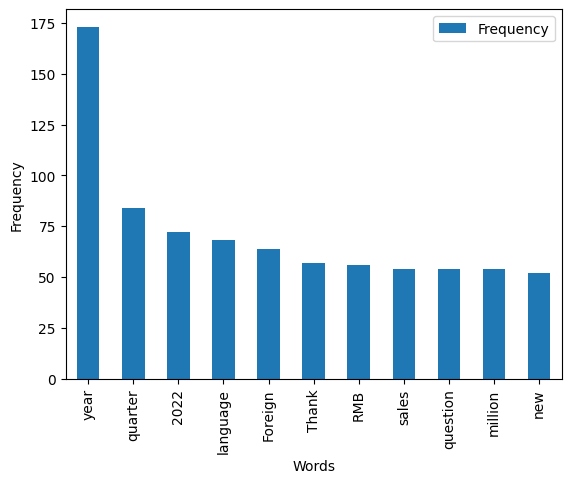

In [15]:
import matplotlib.pyplot as plt

df.plot(kind='bar', x='Word', y='Frequency')

# Label the x-axis and y-axis
plt.xlabel("Words")
plt.ylabel("Frequency")

# Show the plot
plt.show()

The table resulting from the code shows the top five most frequent words in the text and their respective frequencies, with "year" being the most frequent followed by "quarter" and "2022". The presence of "language" and "Foreign" in the top five suggests they are important concepts in the text, but further analysis is needed to understand the content and meaning. Overall, the code provides useful insights into word frequency and can be a starting point for further analysis.

Sentiment Analysis

In [20]:
%%capture
import nltk 
nltk.download('punkt')

sentences = nltk.sent_tokenize(calls)

In [21]:
from textblob import TextBlob
import numpy as np

polarity_scores = []

for sentence in sentences:
    blob = TextBlob(sentence)
    polarity = blob.sentiment.polarity
    polarity_scores.append(polarity)

print("Average polarity score:", np.mean(polarity_scores))

Average polarity score: 0.09663497196666056


<ipython-input-11-38cf753df447>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(polarity_scores, shade=True)


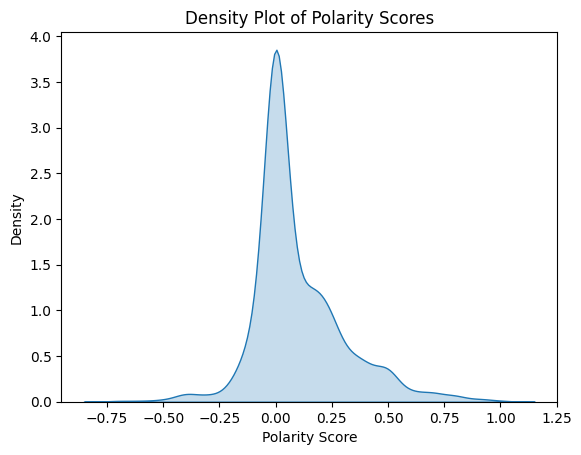

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(polarity_scores, shade=True)
plt.xlabel('Polarity Score')
plt.ylabel('Density')
plt.title('Density Plot of Polarity Scores')
plt.show()

In [12]:
from textblob import TextBlob
import numpy as np

subjectivity_scores = []

for sentence in sentences:
    blob = TextBlob(sentence)
    subjectivity = blob.sentiment.subjectivity
    subjectivity_scores.append(subjectivity)

print("Average subjectivity score:", np.mean(subjectivity_scores))

Average subjectivity score: 0.2975385539297799


<ipython-input-13-2232016f6fc7>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subjectivity_scores, shade=True)


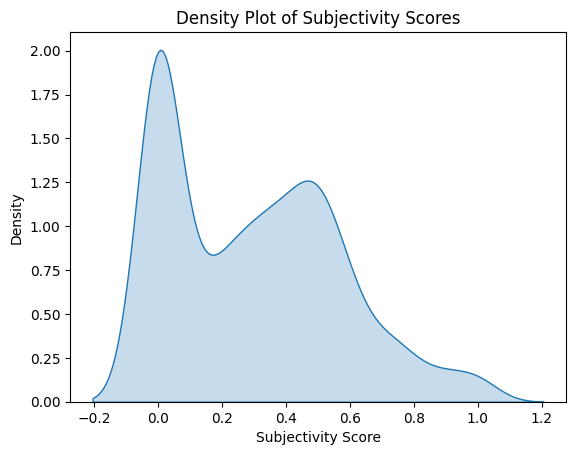

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(subjectivity_scores, shade=True)
plt.xlabel('Subjectivity Score')
plt.ylabel('Density')
plt.title('Density Plot of Subjectivity Scores')
plt.show()